# RBE Part 2: Bayes Theorem Interactive Calculator

> Deep dive into Bayes' theorem with interactive calculators and cybersecurity applications

In [ ]:
#| default_exp rbe.bayes

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt
from fastcore.test import test_eq, test_close
from fastcore.all import *
from technical_blog.rbe import *  # Import all RBE functionality
from fasthtml.common import *
from typing import List, Dict, Tuple, Optional
import seaborn as sns

## Mathematical Foundation: Deriving Bayes' Theorem

Before building our interactive tools, let's derive Bayes' theorem from first principles and understand its profound implications for cybersecurity.

### From Conditional Probability to Bayes' Theorem

Start with the definition of conditional probability:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Similarly:
$$P(B|A) = \frac{P(A \cap B)}{P(A)}$$

Since $P(A \cap B) = P(B \cap A)$, we can equate:
$$P(A|B) \cdot P(B) = P(B|A) \cdot P(A)$$

Rearranging gives us **Bayes' theorem**:
$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

### Cybersecurity Interpretation

Let's translate this into cybersecurity terms:
- $A$ = "System is under attack"
- $B$ = "Suspicious activity detected"

Then:
- $P(A)$ = **Prior**: Base rate of attacks (before seeing evidence)
- $P(B|A)$ = **Likelihood**: Probability of detecting suspicious activity given an attack
- $P(B)$ = **Evidence**: Overall probability of detecting suspicious activity
- $P(A|B)$ = **Posterior**: Probability of attack given suspicious activity detected

In [ ]:
#| export
def bayes_theorem_step_by_step(prior, likelihood, evidence=None, labels=None):
    """Step-by-step Bayes theorem calculation with detailed explanations"""
    prior = np.asarray(prior)
    likelihood = np.asarray(likelihood)
    
    if labels is None:
        labels = [f'H{i+1}' for i in range(len(prior))]
    
    print("=== BAYES' THEOREM STEP-BY-STEP ===")
    print("\n1. Prior Probabilities P(H):")
    for i, (label, p) in enumerate(zip(labels, prior)):
        print(f"   P({label}) = {p:.4f}")
    
    print("\n2. Likelihoods P(E|H):")
    for i, (label, l) in enumerate(zip(labels, likelihood)):
        print(f"   P(Evidence|{label}) = {l:.4f}")
    
    # Calculate evidence if not provided
    if evidence is None:
        evidence = np.sum(prior * likelihood)
    
    print(f"\n3. Total Evidence P(E):")
    print(f"   P(E) = Σ P(E|Hi) × P(Hi) = {evidence:.4f}")
    
    # Calculate posterior
    posterior = bayes_update(prior, likelihood, evidence)
    
    print("\n4. Posterior Probabilities P(H|E):")
    for i, (label, post) in enumerate(zip(labels, posterior)):
        ratio = post / prior[i] if prior[i] > 0 else float('inf')
        print(f"   P({label}|E) = {post:.4f} (×{ratio:.2f} from prior)")
    
    return {
        'prior': prior,
        'likelihood': likelihood, 
        'evidence': evidence,
        'posterior': posterior,
        'labels': labels
    }

# Demonstrate with cybersecurity example
example = bayes_theorem_step_by_step(
    prior=[0.05, 0.95],  # 5% chance of attack initially
    likelihood=[0.9, 0.1],  # Attack causes suspicious activity 90% of time
    labels=['Attack', 'Normal']
)

=== BAYES' THEOREM STEP-BY-STEP ===

1. Prior Probabilities P(H):
   P(Attack) = 0.0500
   P(Normal) = 0.9500

2. Likelihoods P(E|H):
   P(Evidence|Attack) = 0.9000
   P(Evidence|Normal) = 0.1000

3. Total Evidence P(E):
   P(E) = Σ P(E|Hi) × P(Hi) = 0.1400

4. Posterior Probabilities P(H|E):
   P(Attack|E) = 0.3214 (×6.43 from prior)
   P(Normal|E) = 0.6786 (×0.71 from prior)


### Geometric Interpretation

Bayes' theorem can be visualized as updating probability distributions:

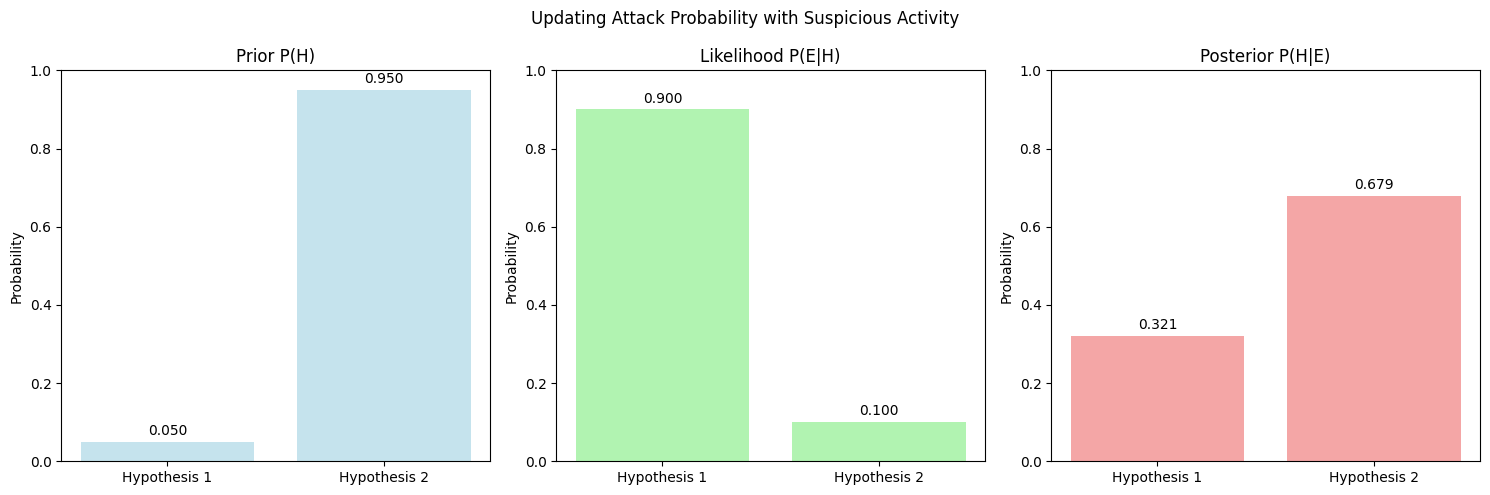

In [ ]:
#| export
def visualize_bayes_update(prior, likelihood, title="Bayes' Theorem Visualization"):
    """Visualize how Bayes' theorem updates probability distributions"""
    
    # Ensure inputs are numpy arrays
    prior = np.asarray(prior)
    likelihood = np.asarray(likelihood)
    
    # Calculate posterior
    posterior = bayes_update(prior, likelihood)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    categories = ['Hypothesis 1', 'Hypothesis 2']
    x_pos = np.arange(len(categories))
    
    # Prior
    bars1 = axes[0].bar(x_pos, prior, alpha=0.7, color='lightblue')
    axes[0].set_title('Prior P(H)')
    axes[0].set_ylabel('Probability')
    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels(categories)
    axes[0].set_ylim(0, 1)
    
    # Add values on bars
    for bar, val in zip(bars1, prior):
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{val:.3f}', ha='center', va='bottom')
    
    # Likelihood
    bars2 = axes[1].bar(x_pos, likelihood, alpha=0.7, color='lightgreen')
    axes[1].set_title('Likelihood P(E|H)')
    axes[1].set_ylabel('Probability')
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels(categories)
    axes[1].set_ylim(0, 1)
    
    for bar, val in zip(bars2, likelihood):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{val:.3f}', ha='center', va='bottom')
    
    # Posterior
    bars3 = axes[2].bar(x_pos, posterior, alpha=0.7, color='lightcoral')
    axes[2].set_title('Posterior P(H|E)')
    axes[2].set_ylabel('Probability')
    axes[2].set_xticks(x_pos)
    axes[2].set_xticklabels(categories)
    axes[2].set_ylim(0, 1)
    
    for bar, val in zip(bars3, posterior):
        height = bar.get_height()
        axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{val:.3f}', ha='center', va='bottom')
    
    plt.suptitle(title)
    plt.tight_layout()
    return fig, axes

# Visualize the cybersecurity example
fig, axes = visualize_bayes_update(
    prior=np.array([0.05, 0.95]),
    likelihood=np.array([0.9, 0.1]),
    title="Updating Attack Probability with Suspicious Activity"
)
plt.show()

In [ ]:
#| export
def bayes_calculator_component():
    """Create interactive Bayes theorem calculator using FastHTML"""
    
    return Div(
        Card(
            H3("Interactive Bayes' Theorem Calculator", cls="text-lg font-bold mb-4"),
            
            # Scenario selector
            Div(
                Label("Cybersecurity Scenario:", cls="block text-sm font-medium mb-2"),
                Select(
                    Option("Network Intrusion Detection", value="intrusion"),
                    Option("Malware Detection", value="malware"),
                    Option("Insider Threat Assessment", value="insider"),
                    Option("Custom Scenario", value="custom"),
                    id="scenario-select",
                    cls="w-full p-2 border rounded"
                ),
                cls="mb-4"
            ),
            
            # Prior probability input
            Div(
                Label("Prior Probability P(Attack):", cls="block text-sm font-medium mb-2"),
                Div(
                    Input(
                        type="range", 
                        id="prior-slider", 
                        min="0.01", 
                        max="0.99", 
                        step="0.01", 
                        value="0.05",
                        cls="w-full"
                    ),
                    Span(id="prior-display", cls="text-sm font-mono"),
                    cls="flex items-center gap-2"
                ),
                cls="mb-4"
            ),
            
            # Likelihood inputs
            Div(
                Label("Likelihood P(Evidence|Attack):", cls="block text-sm font-medium mb-2"),
                Div(
                    Input(
                        type="range", 
                        id="likelihood-attack-slider", 
                        min="0.01", 
                        max="0.99", 
                        step="0.01", 
                        value="0.90",
                        cls="w-full"
                    ),
                    Span(id="likelihood-attack-display", cls="text-sm font-mono"),
                    cls="flex items-center gap-2"
                ),
                cls="mb-4"
            ),
            
            Div(
                Label("Likelihood P(Evidence|Normal):", cls="block text-sm font-medium mb-2"),
                Div(
                    Input(
                        type="range", 
                        id="likelihood-normal-slider", 
                        min="0.01", 
                        max="0.99", 
                        step="0.01", 
                        value="0.10",
                        cls="w-full"
                    ),
                    Span(id="likelihood-normal-display", cls="text-sm font-mono"),
                    cls="flex items-center gap-2"
                ),
                cls="mb-6"
            ),
            
            # Results display
            Div(
                H4("Results:", cls="text-md font-semibold mb-3"),
                Div(id="bayes-results", cls="space-y-2"),
                cls="p-4 bg-gray-50 rounded"
            )
        ),
        
        # JavaScript for real-time calculation
        Script("""
        function updateBayesCalculation() {
            const prior = parseFloat(document.getElementById('prior-slider').value);
            const likelihoodAttack = parseFloat(document.getElementById('likelihood-attack-slider').value);
            const likelihoodNormal = parseFloat(document.getElementById('likelihood-normal-slider').value);
            
            // Update displays
            document.getElementById('prior-display').textContent = (prior * 100).toFixed(1) + '%';
            document.getElementById('likelihood-attack-display').textContent = (likelihoodAttack * 100).toFixed(1) + '%';
            document.getElementById('likelihood-normal-display').textContent = (likelihoodNormal * 100).toFixed(1) + '%';
            
            // Calculate Bayes' theorem
            const evidence = prior * likelihoodAttack + (1 - prior) * likelihoodNormal;
            const posterior = (prior * likelihoodAttack) / evidence;
            
            // Calculate information metrics
            const priorEntropy = prior === 0 || prior === 1 ? 0 : 
                -(prior * Math.log2(prior) + (1-prior) * Math.log2(1-prior));
            const posteriorEntropy = posterior === 0 || posterior === 1 ? 0 : 
                -(posterior * Math.log2(posterior) + (1-posterior) * Math.log2(1-posterior));
            const infoGain = priorEntropy - posteriorEntropy;
            
            // Bayes factor
            const bayesFactor = (likelihoodAttack / likelihoodNormal);
            const oddsRatio = (posterior / (1 - posterior)) / (prior / (1 - prior));
            
            // Update results
            document.getElementById('bayes-results').innerHTML = `
                <div class="grid grid-cols-2 gap-4">
                    <div>
                        <p class="text-sm text-gray-600">Prior Probability:</p>
                        <p class="text-lg font-semibold">${(prior * 100).toFixed(1)}%</p>
                    </div>
                    <div>
                        <p class="text-sm text-gray-600">Posterior Probability:</p>
                        <p class="text-lg font-semibold text-red-600">${(posterior * 100).toFixed(1)}%</p>
                    </div>
                    <div>
                        <p class="text-sm text-gray-600">Bayes Factor:</p>
                        <p class="text-lg font-semibold">${bayesFactor.toFixed(2)}</p>
                    </div>
                    <div>
                        <p class="text-sm text-gray-600">Information Gain:</p>
                        <p class="text-lg font-semibold">${infoGain.toFixed(3)} bits</p>
                    </div>
                </div>
                <div class="mt-4 p-3 bg-blue-50 rounded">
                    <p class="text-sm"><strong>Interpretation:</strong></p>
                    <p class="text-sm">${interpretBayesResult(posterior, prior, bayesFactor)}</p>
                </div>
            `;
        }
        
        function interpretBayesResult(posterior, prior, bayesFactor) {
            const increase = posterior / prior;
            
            if (bayesFactor > 10) {
                return `Strong evidence for attack (${increase.toFixed(1)}x increase from prior). Bayes factor ${bayesFactor.toFixed(1)} indicates very strong evidence.`;
            } else if (bayesFactor > 3) {
                return `Moderate evidence for attack (${increase.toFixed(1)}x increase from prior). Bayes factor ${bayesFactor.toFixed(1)} indicates moderate evidence.`;
            } else if (bayesFactor > 1) {
                return `Weak evidence for attack (${increase.toFixed(1)}x increase from prior). Bayes factor ${bayesFactor.toFixed(1)} indicates weak evidence.`;
            } else {
                return `Evidence actually supports normal activity. Posterior probability decreased from prior.`;
            }
        }
        
        // Scenario presets
        function loadScenario() {
            const scenario = document.getElementById('scenario-select').value;
            const presets = {
                'intrusion': { prior: 0.05, likelihoodAttack: 0.90, likelihoodNormal: 0.10 },
                'malware': { prior: 0.15, likelihoodAttack: 0.85, likelihoodNormal: 0.05 },
                'insider': { prior: 0.02, likelihoodAttack: 0.70, likelihoodNormal: 0.20 },
                'custom': { prior: 0.50, likelihoodAttack: 0.80, likelihoodNormal: 0.20 }
            };
            
            if (presets[scenario]) {
                document.getElementById('prior-slider').value = presets[scenario].prior;
                document.getElementById('likelihood-attack-slider').value = presets[scenario].likelihoodAttack;
                document.getElementById('likelihood-normal-slider').value = presets[scenario].likelihoodNormal;
                updateBayesCalculation();
            }
        }
        
        // Event listeners
        document.getElementById('prior-slider').addEventListener('input', updateBayesCalculation);
        document.getElementById('likelihood-attack-slider').addEventListener('input', updateBayesCalculation);
        document.getElementById('likelihood-normal-slider').addEventListener('input', updateBayesCalculation);
        document.getElementById('scenario-select').addEventListener('change', loadScenario);
        
        // Initial calculation
        updateBayesCalculation();
        """)
    )

# Display the calculator (in FastHTML app this would be interactive)
print("Interactive Bayes' Theorem Calculator created!")
print("Features:")
print("- Real-time probability updates")
print("- Multiple cybersecurity scenarios")
print("- Bayes factor interpretation")
print("- Information gain calculation")

from IPython.display import HTML
HTML(str(bayes_calculator_component()))

Interactive Bayes' Theorem Calculator created!
Features:
- Real-time probability updates
- Multiple cybersecurity scenarios
- Bayes factor interpretation
- Information gain calculation


## Sensitivity Analysis: How Robust Are Our Conclusions?

A critical aspect of Bayesian reasoning is understanding how sensitive our conclusions are to our assumptions. Let's build tools to explore this:

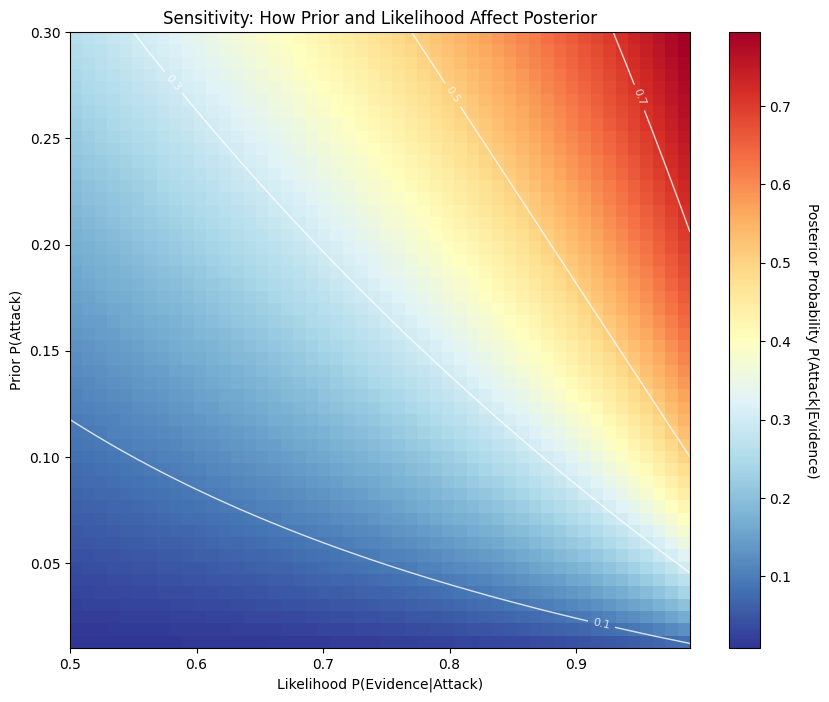


Sensitivity Analysis Insights:
- Light regions: High posterior probability (confident attack detection)
- Dark regions: Low posterior probability (likely false alarm)
- Contour lines: Iso-probability curves
- Steep gradients: High sensitivity to parameter changes


In [ ]:
#| export
def sensitivity_analysis(prior_range, likelihood_range, n_points=50):
    """Analyze sensitivity of posterior to changes in prior and likelihood"""
    
    prior_min, prior_max = prior_range
    like_min, like_max = likelihood_range
    
    # Create parameter grids
    priors = np.linspace(prior_min, prior_max, n_points)
    likelihoods = np.linspace(like_min, like_max, n_points)
    
    # Calculate posterior for each combination
    posteriors = np.zeros((n_points, n_points))
    
    for i, prior in enumerate(priors):
        for j, likelihood in enumerate(likelihoods):
            # Assume complementary likelihood for normal case
            likelihood_normal = 1 - likelihood + 0.1  # Add small offset
            likelihood_normal = np.clip(likelihood_normal, 0.01, 0.99)
            
            posterior = bayes_update(
                np.array([prior, 1-prior]), 
                np.array([likelihood, likelihood_normal])
            )[0]
            posteriors[i, j] = posterior
    
    return priors, likelihoods, posteriors

def plot_sensitivity_heatmap(priors, likelihoods, posteriors, title="Posterior Sensitivity Analysis"):
    """Plot sensitivity analysis as a heatmap"""
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create heatmap
    im = ax.imshow(posteriors, extent=[likelihoods.min(), likelihoods.max(), 
                                     priors.min(), priors.max()],
                  aspect='auto', origin='lower', cmap='RdYlBu_r')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Posterior Probability P(Attack|Evidence)', rotation=270, labelpad=20)
    
    # Add contours
    contours = ax.contour(likelihoods, priors, posteriors, 
                         levels=[0.1, 0.3, 0.5, 0.7, 0.9], 
                         colors='white', alpha=0.8, linewidths=1)
    ax.clabel(contours, inline=True, fontsize=8, fmt='%.1f')
    
    ax.set_xlabel('Likelihood P(Evidence|Attack)')
    ax.set_ylabel('Prior P(Attack)')
    ax.set_title(title)
    
    return fig, ax

# Run sensitivity analysis
priors, likelihoods, posteriors = sensitivity_analysis(
    prior_range=(0.01, 0.3),     # Prior from 1% to 30%
    likelihood_range=(0.5, 0.99) # Likelihood from 50% to 99%
)

fig, ax = plot_sensitivity_heatmap(priors, likelihoods, posteriors, 
                                  "Sensitivity: How Prior and Likelihood Affect Posterior")
plt.show()

print("\nSensitivity Analysis Insights:")
print("- Light regions: High posterior probability (confident attack detection)")
print("- Dark regions: Low posterior probability (likely false alarm)")
print("- Contour lines: Iso-probability curves")
print("- Steep gradients: High sensitivity to parameter changes")

## Advanced Cybersecurity Applications

Now let's explore sophisticated applications of Bayes' theorem in cybersecurity contexts:

=== THREAT INTELLIGENCE FUSION ===
Initial threat assessment: 10.0%

Source: Commercial_TI (reliability: 0.8)
Report: NO THREAT
Updated threat assessment: 1.9%
Confidence: 0.863

Source: Government_Feed (reliability: 0.9)
Report: THREAT DETECTED
Updated threat assessment: 27.1%
Confidence: 0.156

Source: OSINT_Analysis (reliability: 0.7)
Report: NO THREAT
Updated threat assessment: 13.8%
Confidence: 0.422

Source: Internal_SOC (reliability: 0.8)
Report: NO THREAT
Updated threat assessment: 3.8%
Confidence: 0.765



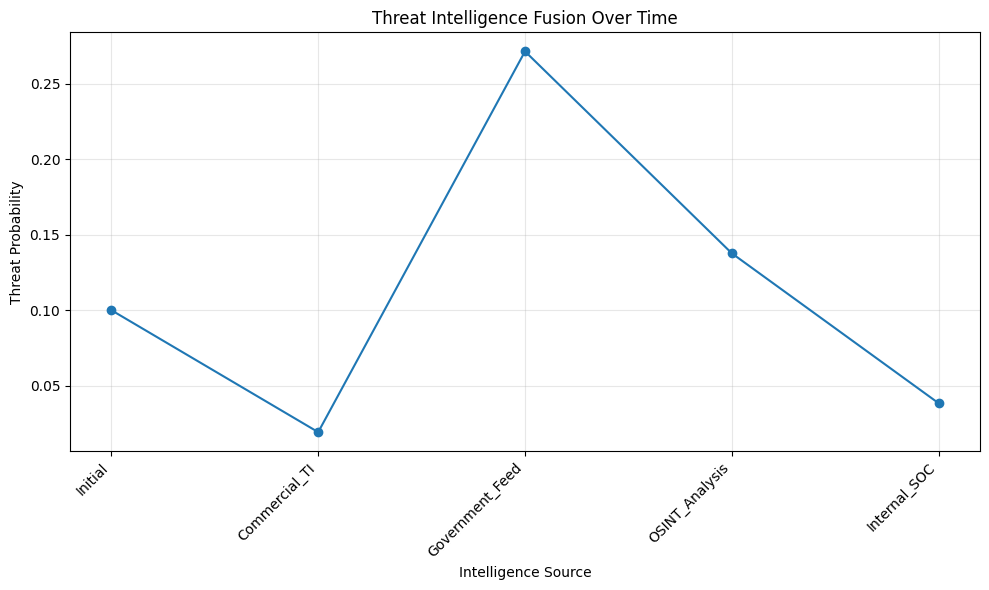

In [ ]:
#| export
def threat_intelligence_fusion(intelligence_sources, reliabilities, rng=None):
    """Fuse multiple threat intelligence sources using Bayesian updating"""
    if rng is None: rng = np.random.default_rng(42)
    
    # Start with base rate
    prior = np.array([0.1, 0.9])  # 10% base threat probability
    
    # Track evolution
    belief_history = [prior.copy()]
    current_belief = prior.copy()
    
    print("=== THREAT INTELLIGENCE FUSION ===")
    print(f"Initial threat assessment: {current_belief[0]*100:.1f}%\n")
    
    for source, reliability in zip(intelligence_sources, reliabilities):
        # Generate intelligence report (threat detected or not)
        threat_detected = rng.random() < 0.6  # 60% chance of threat detection
        
        if threat_detected:
            # Likelihood depends on source reliability
            likelihood = np.array([reliability, 1-reliability])
            evidence_type = "THREAT DETECTED"
        else:
            # No threat detected - inverse likelihood
            likelihood = np.array([1-reliability, reliability])
            evidence_type = "NO THREAT"
        
        # Update belief
        current_belief = bayes_update(current_belief, likelihood)
        belief_history.append(current_belief.copy())
        
        print(f"Source: {source} (reliability: {reliability:.1f})")
        print(f"Report: {evidence_type}")
        print(f"Updated threat assessment: {current_belief[0]*100:.1f}%")
        print(f"Confidence: {1 - prob_entropy(current_belief):.3f}\n")
    
    return np.array(belief_history)

# Demonstrate threat intelligence fusion
sources = ['Commercial_TI', 'Government_Feed', 'OSINT_Analysis', 'Internal_SOC']
reliabilities = [0.85, 0.95, 0.70, 0.80]

fusion_results = threat_intelligence_fusion(sources, reliabilities)

# Visualize the fusion process
fig, ax = viz_beliefs(fusion_results[:, 0], title='Threat Intelligence Fusion Over Time')
ax.set_ylabel('Threat Probability')
ax.set_xlabel('Intelligence Source')

# Add source labels
source_labels = ['Initial'] + sources
ax.set_xticks(range(len(source_labels)))
ax.set_xticklabels(source_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

### False Positive/Negative Analysis

Understanding the trade-offs between false positives and false negatives is crucial in cybersecurity:

Cybersecurity Detection Analysis:
Base attack rate: 5.0%
Sensitivity (attack detection rate): 90.0%
Specificity (normal classification rate): 95.0%

Results:
False Positive Rate: 5.0%
Precision (when alarm raised): 48.6%
False alarms per true attack: 1.1


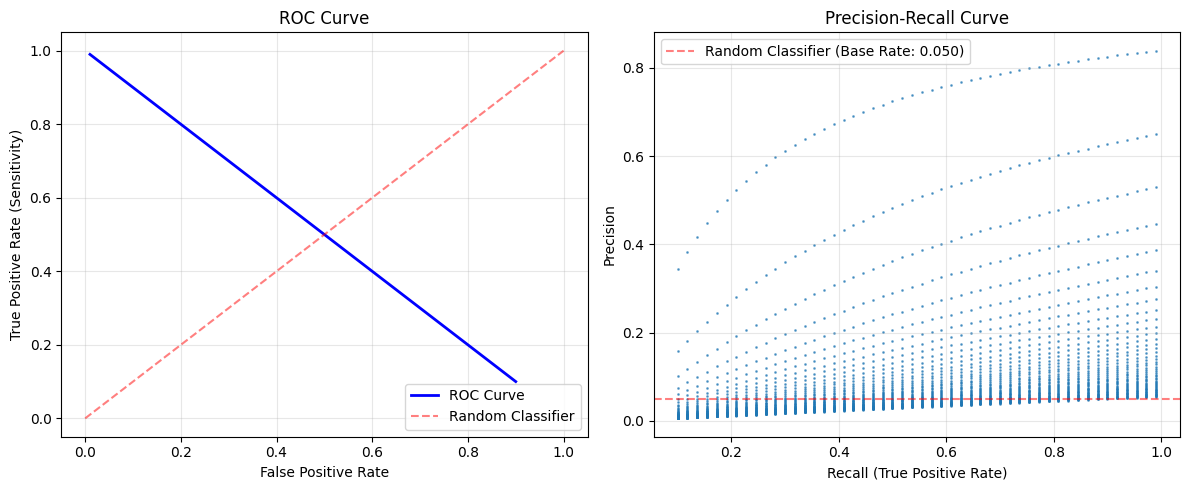

In [ ]:
#| export
def false_rate_analysis(base_rate, sensitivity, specificity, threshold_range=(0.1, 0.9)):
    """Analyze false positive and false negative rates across decision thresholds"""
    
    thresholds = np.linspace(threshold_range[0], threshold_range[1], 100)
    
    results = {
        'thresholds': thresholds,
        'false_positive_rate': [],
        'false_negative_rate': [],
        'precision': [],
        'recall': []
    }
    
    for threshold in thresholds:
        # For each threshold, calculate confusion matrix elements
        
        # True positive rate (sensitivity)
        tpr = sensitivity
        
        # False positive rate
        fpr = 1 - specificity
        
        # Calculate actual rates based on base rate
        tp = base_rate * tpr  # True attacks correctly identified
        fp = (1 - base_rate) * fpr  # Normal activity flagged as attack
        tn = (1 - base_rate) * specificity  # Normal activity correctly identified
        fn = base_rate * (1 - tpr)  # Attacks missed
        
        # Calculate metrics
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        results['false_positive_rate'].append(fpr)
        results['false_negative_rate'].append(1 - tpr)
        results['precision'].append(precision)
        results['recall'].append(recall)
    
    return results

def plot_roc_and_precision_recall(base_rate, sensitivity, specificity):
    """Plot ROC curve and Precision-Recall curve"""
    
    # Generate data for different sensitivity/specificity combinations
    sensitivities = np.linspace(0.1, 0.99, 50)
    specificities = np.linspace(0.1, 0.99, 50)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # ROC Curve
    fprs = 1 - specificities
    tprs = sensitivities
    
    ax1.plot(fprs, tprs, 'b-', linewidth=2, label='ROC Curve')
    ax1.plot([0, 1], [0, 1], 'r--', alpha=0.5, label='Random Classifier')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate (Sensitivity)')
    ax1.set_title('ROC Curve')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Precision-Recall Curve
    precisions = []
    recalls = []
    
    for sens in sensitivities:
        for spec in specificities:
            tp = base_rate * sens
            fp = (1 - base_rate) * (1 - spec)
            fn = base_rate * (1 - sens)
            
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            
            if precision > 0 and recall > 0:
                precisions.append(precision)
                recalls.append(recall)
    
    ax2.scatter(recalls, precisions, alpha=0.6, s=1)
    ax2.axhline(base_rate, color='r', linestyle='--', alpha=0.5, 
               label=f'Random Classifier (Base Rate: {base_rate:.3f})')
    ax2.set_xlabel('Recall (True Positive Rate)')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curve')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig, (ax1, ax2)

# Analyze false rates for cybersecurity detection
base_rate = 0.05  # 5% of events are actual attacks
sensitivity = 0.90  # 90% of attacks are detected
specificity = 0.95  # 95% of normal events are correctly classified

print(f"Cybersecurity Detection Analysis:")
print(f"Base attack rate: {base_rate*100:.1f}%")
print(f"Sensitivity (attack detection rate): {sensitivity*100:.1f}%")
print(f"Specificity (normal classification rate): {specificity*100:.1f}%")

# Calculate key metrics
fpr = 1 - specificity
tp_rate = base_rate * sensitivity
fp_rate = (1 - base_rate) * fpr
precision = tp_rate / (tp_rate + fp_rate)

print(f"\nResults:")
print(f"False Positive Rate: {fpr*100:.1f}%")
print(f"Precision (when alarm raised): {precision*100:.1f}%")
print(f"False alarms per true attack: {fp_rate/tp_rate:.1f}")

# Plot ROC and Precision-Recall curves
fig, axes = plot_roc_and_precision_recall(base_rate, sensitivity, specificity)
plt.show()

## Common Pitfalls and Misconceptions

Let's address the most common mistakes people make when applying Bayes' theorem:

In [ ]:
#| export
def demonstrate_base_rate_neglect():
    """Demonstrate the base rate neglect fallacy with cybersecurity examples"""
    
    print("=== BASE RATE NEGLECT DEMONSTRATION ===")
    print("\nScenario: Network Intrusion Detection System")
    print("- System has 95% accuracy (detects 95% of attacks, 5% false positives)")
    print("- System raises an alarm - what's the probability of a real attack?")
    
    # Different base rates
    base_rates = [0.001, 0.01, 0.05, 0.1]  # 0.1%, 1%, 5%, 10%
    accuracy = 0.95
    
    print("\nIntuitive Answer: 95% (matching the system accuracy)")
    print("Correct Bayesian Answer:")
    
    for base_rate in base_rates:
        # Bayes' theorem calculation
        prior = np.array([base_rate, 1 - base_rate])
        likelihood = np.array([accuracy, 1 - accuracy])  # P(alarm | attack/normal)
        posterior = bayes_update(prior, likelihood)
        
        false_alarms_per_true = ((1-base_rate) * (1-accuracy)) / (base_rate * accuracy)
        
        print(f"\nBase rate: {base_rate*100:5.1f}% -> Posterior: {posterior[0]*100:5.1f}%")
        print(f"  False alarms per true attack: {false_alarms_per_true:.1f}")
    
    print("\n*** KEY INSIGHT ***")
    print("When base rates are low, even accurate systems generate many false positives!")
    print("This is why cybersecurity requires careful threshold tuning.")

def demonstrate_conjunction_fallacy():
    """Demonstrate conjunction fallacy in threat assessment"""
    
    print("\n=== CONJUNCTION FALLACY DEMONSTRATION ===")
    print("\nScenario: Insider Threat Assessment")
    print("Employee shows suspicious behavior:")
    print("A) Employee is a security risk")
    print("B) Employee is a security risk AND accessing financial data")
    
    # Many people incorrectly think B is more likely than A
    print("\nCommon Error: B seems more specific and likely")
    print("Mathematical Truth: P(A and B) ≤ P(A) always!")
    
    # Demonstrate with numbers
    p_risk = 0.3  # 30% chance of being a risk
    p_financial_access = 0.4  # 40% have financial access
    p_both = p_risk * p_financial_access  # Assuming independence
    
    print(f"\nP(Security Risk) = {p_risk:.2f}")
    print(f"P(Risk AND Financial Access) = {p_both:.2f}")
    print(f"\nThe conjunction is always less likely than its components!")

# Run demonstrations
demonstrate_base_rate_neglect()
demonstrate_conjunction_fallacy()

=== BASE RATE NEGLECT DEMONSTRATION ===

Scenario: Network Intrusion Detection System
- System has 95% accuracy (detects 95% of attacks, 5% false positives)
- System raises an alarm - what's the probability of a real attack?

Intuitive Answer: 95% (matching the system accuracy)
Correct Bayesian Answer:

Base rate:   0.1% -> Posterior:   1.9%
  False alarms per true attack: 52.6

Base rate:   1.0% -> Posterior:  16.1%
  False alarms per true attack: 5.2

Base rate:   5.0% -> Posterior:  50.0%
  False alarms per true attack: 1.0

Base rate:  10.0% -> Posterior:  67.9%
  False alarms per true attack: 0.5

*** KEY INSIGHT ***
When base rates are low, even accurate systems generate many false positives!
This is why cybersecurity requires careful threshold tuning.

=== CONJUNCTION FALLACY DEMONSTRATION ===

Scenario: Insider Threat Assessment
Employee shows suspicious behavior:
A) Employee is a security risk
B) Employee is a security risk AND accessing financial data

Common Error: B seems m

## Model Comparison with Bayes Factors

Bayes factors provide a principled way to compare different hypotheses:

In [ ]:
#| export
def model_comparison_cybersec(evidence_data, rng=None):
    """Compare different threat models using Bayes factors"""
    if rng is None: rng = np.random.default_rng(42)
    
    # Define competing models
    models = {
        'Benign': {
            'prior': 0.7,
            'likelihood_fn': lambda evidence: np.exp(-0.5 * evidence**2)  # Normal activity
        },
        'Insider_Threat': {
            'prior': 0.15,
            'likelihood_fn': lambda evidence: np.exp(-0.5 * (evidence - 2)**2)  # Moderate anomaly
        },
        'External_Attack': {
            'prior': 0.10,
            'likelihood_fn': lambda evidence: np.exp(-0.5 * (evidence - 4)**2)  # High anomaly
        },
        'APT': {
            'prior': 0.05,
            'likelihood_fn': lambda evidence: np.exp(-0.5 * (evidence - 1)**2) * 0.5 + 
                                            np.exp(-0.5 * (evidence - 3)**2) * 0.5  # Bimodal
        }
    }
    
    # Calculate model evidence for each model
    model_evidence = {}
    
    print("=== MODEL COMPARISON ANALYSIS ===")
    print(f"Evidence data: {evidence_data}\n")
    
    for model_name, model in models.items():
        # Calculate likelihood of evidence under this model
        likelihood = 1.0
        for evidence in evidence_data:
            likelihood *= model['likelihood_fn'](evidence)
        
        # Model evidence = prior × likelihood
        evidence_val = model['prior'] * likelihood
        model_evidence[model_name] = evidence_val
        
        print(f"{model_name:15}: Prior={model['prior']:.3f}, Likelihood={likelihood:.6f}, Evidence={evidence_val:.8f}")
    
    # Normalize to get posterior model probabilities
    total_evidence = sum(model_evidence.values())
    model_posteriors = {name: evidence/total_evidence for name, evidence in model_evidence.items()}
    
    print("\n=== POSTERIOR MODEL PROBABILITIES ===")
    for model_name, posterior in sorted(model_posteriors.items(), key=lambda x: x[1], reverse=True):
        print(f"{model_name:15}: {posterior*100:6.2f}%")
    
    # Calculate Bayes factors (relative to most likely model)
    best_model = max(model_posteriors.items(), key=lambda x: x[1])
    print(f"\n=== BAYES FACTORS (relative to {best_model[0]}) ===")
    
    for model_name, posterior in model_posteriors.items():
        if model_name != best_model[0]:
            bayes_factor = best_model[1] / posterior
            print(f"{model_name:15}: BF = {bayes_factor:6.2f} ({interpret_bayes_factor(bayes_factor)})")
    
    return model_posteriors

def interpret_bayes_factor(bf):
    """Interpret Bayes factor strength of evidence"""
    if bf < 1:
        return "Evidence against"
    elif bf < 3:
        return "Weak evidence"
    elif bf < 10:
        return "Moderate evidence"
    elif bf < 30:
        return "Strong evidence"
    elif bf < 100:
        return "Very strong evidence"
    else:
        return "Decisive evidence"

# Test with different evidence scenarios
print("Scenario 1: Low anomaly evidence")
model_comparison_cybersec([0.5, 0.8, 0.3])

print("\n" + "="*50)
print("Scenario 2: High anomaly evidence")
model_comparison_cybersec([3.5, 4.2, 3.8])

print("\n" + "="*50)
print("Scenario 3: Mixed evidence (possible APT)")
model_comparison_cybersec([1.2, 2.8, 1.5, 3.1])

Scenario 1: Low anomaly evidence
=== MODEL COMPARISON ANALYSIS ===
Evidence data: [0.5, 0.8, 0.3]

Benign         : Prior=0.700, Likelihood=0.612626, Evidence=0.42883848
Insider_Threat : Prior=0.150, Likelihood=0.037254, Evidence=0.00558808
External_Attack: Prior=0.100, Likelihood=0.000000, Evidence=0.00000000
APT            : Prior=0.050, Likelihood=0.100140, Evidence=0.00500698

=== POSTERIOR MODEL PROBABILITIES ===
Benign         :  97.59%
Insider_Threat :   1.27%
APT            :   1.14%
External_Attack:   0.00%

=== BAYES FACTORS (relative to Benign) ===
Insider_Threat : BF =  76.74 (Very strong evidence)
External_Attack: BF = 308092354.74 (Decisive evidence)
APT            : BF =  85.65 (Very strong evidence)

Scenario 2: High anomaly evidence
=== MODEL COMPARISON ANALYSIS ===
Evidence data: [3.5, 4.2, 3.8]

Benign         : Prior=0.700, Likelihood=0.000000, Evidence=0.00000000
Insider_Threat : Prior=0.150, Likelihood=0.005713, Evidence=0.00085696
External_Attack: Prior=0.100, Li

{'Benign': np.float64(0.0004089357946369229),
 'Insider_Threat': np.float64(0.867276500627491),
 'External_Attack': np.float64(0.0006439673418058053),
 'APT': np.float64(0.1316705962360662)}

## Integration with RBE Framework

Let's connect our Bayes theorem tools with the existing RBE core functions:

=== INTEGRATED BAYESIAN THREAT TRACKING ===
Combining discrete Bayes updates with continuous RBE estimation

Step 1: Observation = 0.200
  Discrete: ['Benign=96.2%', 'Suspicious=3.4%', 'Malicious=0.4%']
  Continuous threat level: 0.255
  Uncertainty: 0.249 bits

Step 2: Observation = 0.350
  Discrete: ['Benign=93.3%', 'Suspicious=6.6%', 'Malicious=0.1%']
  Continuous threat level: 0.285
  Uncertainty: 0.363 bits

Step 3: Observation = 0.600
  Discrete: ['Benign=87.6%', 'Suspicious=12.3%', 'Malicious=0.0%']
  Continuous threat level: 0.417
  Uncertainty: 0.543 bits

Step 4: Observation = 0.800
  Discrete: ['Benign=70.2%', 'Suspicious=29.6%', 'Malicious=0.2%']
  Continuous threat level: 0.548
  Uncertainty: 0.895 bits

Step 5: Observation = 0.750
  Discrete: ['Benign=43.8%', 'Suspicious=55.5%', 'Malicious=0.7%']
  Continuous threat level: 0.624
  Uncertainty: 1.042 bits

Step 6: Observation = 0.400
  Discrete: ['Benign=28.3%', 'Suspicious=71.6%', 'Malicious=0.1%']
  Continuous threat lev

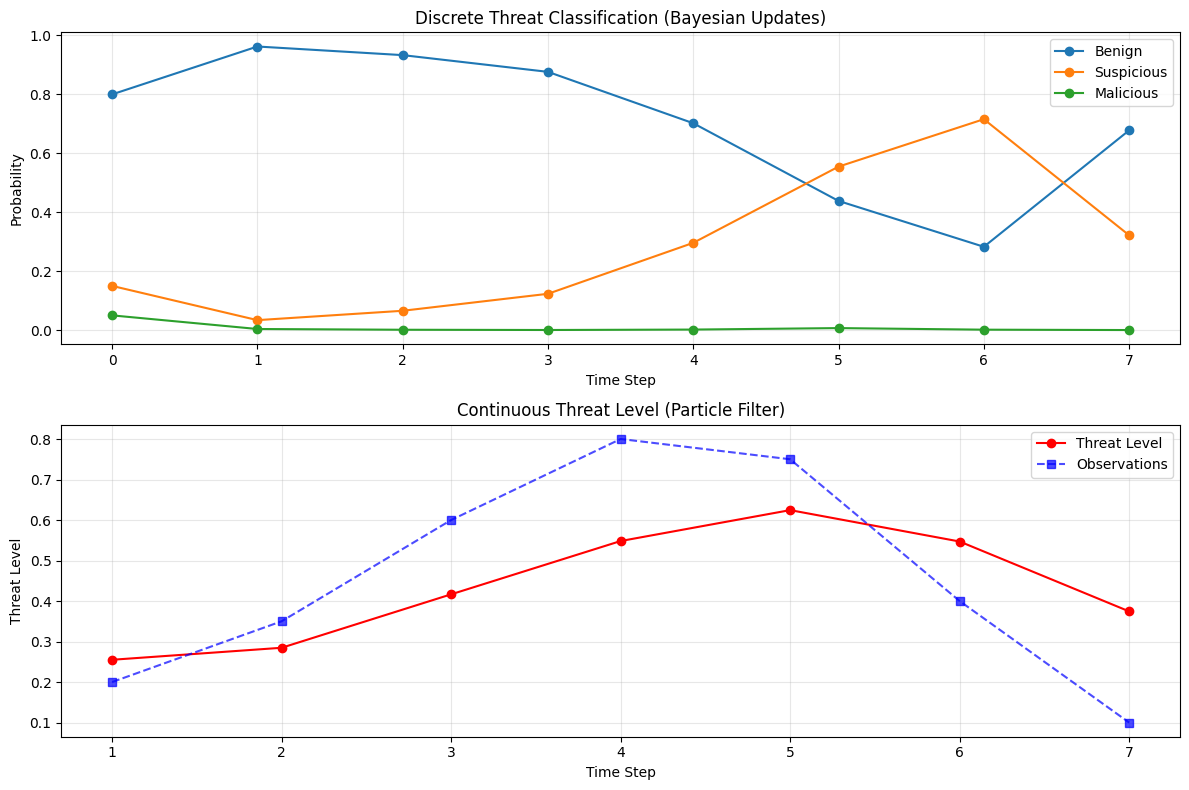

In [ ]:
#| export
def integrated_threat_tracking(observations, rng=None):
    """Demonstrate integration of Bayes theorem with RBE particle filtering"""
    if rng is None: rng = np.random.default_rng(42)
    
    print("=== INTEGRATED BAYESIAN THREAT TRACKING ===")
    print("Combining discrete Bayes updates with continuous RBE estimation\n")
    
    # Discrete threat classification using Bayes theorem
    threat_types = ['Benign', 'Suspicious', 'Malicious']
    threat_prior = np.array([0.8, 0.15, 0.05])
    
    # Continuous threat level estimation using particle filter
    def threat_transition(particle, rng):
        """Threat level evolves slowly with noise"""
        return np.clip(particle + rng.normal(0, 0.1), 0, 1)
    
    def threat_likelihood(particle, observation):
        """Observation likelihood depends on threat level"""
        expected = particle[0]  # Threat level between 0 and 1
        return np.exp(-0.5 * ((observation - expected) / 0.2)**2)
    
    # Initialize particle filter for continuous estimation
    particles, weights = pf_init(500, 1, rng=rng)
    
    # Track both discrete and continuous estimates
    discrete_beliefs = [threat_prior.copy()]
    continuous_estimates = []
    
    current_belief = threat_prior.copy()
    
    for i, obs in enumerate(observations):
        print(f"Step {i+1}: Observation = {obs:.3f}")
        
        # Discrete Bayesian update
        if obs < 0.3:
            likelihood = np.array([0.8, 0.15, 0.05])  # Likely benign
        elif obs < 0.7:
            likelihood = np.array([0.3, 0.6, 0.1])   # Likely suspicious
        else:
            likelihood = np.array([0.1, 0.3, 0.6])   # Likely malicious
        
        current_belief = bayes_update(current_belief, likelihood)
        discrete_beliefs.append(current_belief.copy())
        
        # Continuous particle filter update
        particles, weights = pf_step(particles, weights, obs, 
                                   threat_transition, threat_likelihood, rng=rng)
        
        # Estimate continuous threat level
        threat_level = np.average(particles.flatten(), weights=weights)
        continuous_estimates.append(threat_level)
        
        print(f"  Discrete: {[f'{threat_types[j]}={current_belief[j]*100:.1f}%' for j in range(3)]}")
        print(f"  Continuous threat level: {threat_level:.3f}")
        print(f"  Uncertainty: {prob_entropy(current_belief):.3f} bits\n")
    
    return {
        'discrete_beliefs': np.array(discrete_beliefs),
        'continuous_estimates': np.array(continuous_estimates),
        'threat_types': threat_types
    }

# Run integrated tracking demonstration
test_observations = [0.2, 0.35, 0.6, 0.8, 0.75, 0.4, 0.1]
results = integrated_threat_tracking(test_observations)

# Visualize results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot discrete belief evolution
time_steps = np.arange(len(results['discrete_beliefs']))
for i, threat_type in enumerate(results['threat_types']):
    ax1.plot(time_steps, results['discrete_beliefs'][:, i], 
            marker='o', label=threat_type)

ax1.set_title('Discrete Threat Classification (Bayesian Updates)')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Probability')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot continuous threat level
obs_steps = np.arange(1, len(results['continuous_estimates']) + 1)
ax2.plot(obs_steps, results['continuous_estimates'], 'r-o', label='Threat Level')
ax2.plot(obs_steps, test_observations, 'b--s', alpha=0.7, label='Observations')

ax2.set_title('Continuous Threat Level (Particle Filter)')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Threat Level')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary: Key Takeaways

We've built a comprehensive understanding of Bayes' theorem and its applications in cybersecurity:

### Core Mathematical Insights
1. **Bayes' Theorem**: $P(H|E) = \frac{P(E|H) \cdot P(H)}{P(E)}$
2. **Components**: Prior beliefs + Evidence → Posterior beliefs  
3. **Sensitivity Analysis**: Understanding how assumptions affect conclusions
4. **Model Comparison**: Using Bayes factors to choose between hypotheses

### Practical Applications
- **Interactive calculators** for real-time threat assessment
- **Threat intelligence fusion** from multiple sources
- **False positive/negative analysis** for system tuning
- **Multi-model comparison** for complex scenarios

### Common Pitfalls Addressed
- **Base rate neglect**: Low base rates → many false positives
- **Conjunction fallacy**: P(A and B) ≤ P(A) always
- **Likelihood confusion**: P(E|H) ≠ P(H|E)

### Integration with RBE
- **Discrete updates** for categorical threat classification
- **Continuous estimation** for threat level tracking
- **Hybrid approaches** combining both paradigms

### Next Steps
In the next notebook, we'll explore how these Bayesian foundations enable sophisticated **Recursive Bayesian Estimation** techniques for real-time cybersecurity monitoring and adaptive threat detection systems.

In [ ]:
#| export
__all__ = [
    'bayes_theorem_step_by_step',
    'visualize_bayes_update',
    'bayes_calculator_component',
    'sensitivity_analysis',
    'plot_sensitivity_heatmap',
    'threat_intelligence_fusion',
    'false_rate_analysis', 
    'plot_roc_and_precision_recall',
    'demonstrate_base_rate_neglect',
    'demonstrate_conjunction_fallacy',
    'model_comparison_cybersec',
    'interpret_bayes_factor',
    'integrated_threat_tracking'
]